Please input a number in between -20 and 20
What is your guess for the root?19


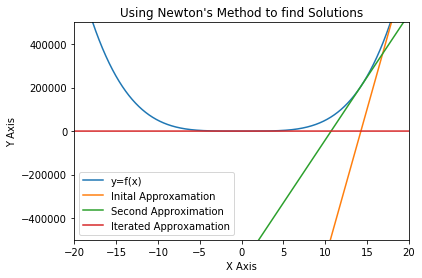

Your guess for the x-intercept was 19.0...
Using Newton's Method, the real approximate solution is 0.474


In [166]:
#Import Statements & Inline Magic
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Recieving user input for inital guess
print("Please input a number in between -20 and 20")
guess = float(input("What is your guess for the root?"))
    


#defining list x to 3 decimal places from -10 to 10
def range_float(start,stop,step):
    x = start
    while x <= stop:
        yield x
        x=x + step
        
generator = range_float(-20,20,.001)
x = []
for i in generator:
    x.append(round(i,4))

    


#These are a few sample functions that can be used to test Newton's Method:
# You can feel free to write a few new functions using the same pattern used below
# Note the computer will not accept functions with asymptotes as it asks the program to divide by 0 (ex. y = 1/x)

quadratic = [3*i**2 for i in x] #3x^2
cubic = [2*i**3-6*i**2+5*i+1 for i in x] #2x^3 -6x^2 + 5x +1
quartic = [5*i**4-3*i**2+3*i-1 for i in x] #5x^4 - 3x^2 +3x - 1

# Here are the derivatives of the functions above needed for the program:
quadraticdev = [6*i for i in x] #6x
cubicdev = [(6*(i**2))-(12*i)+5 for i in x] #6x^2 -12x + 5
quarticdev = [20*i**3-6*i+3 for i in x] #20x^3 - 6x +3



#Here, you can define which functions you want the program to use. It is preset at "quartic" and "quarticdev"
#Note Make sure the derivative matches the function
FunctionOfChoice = quartic
DevFunctionOfChoice = quarticdev


#this function accepts the parameters of the guess, the function, and the derivative of the function
# the output is the tagent line as "model", and the x-intercept of the tangent line as "x-int"
def tangentline(guess,function,devfunction):
    point = [guess,function[int(x.index(guess))]]
    m = devfunction[int(x.index(guess))]    
    model = [m*i +(point[1]-(m*point[0])) for i in x]
    xint = (-1*(point[1]-(m*point[0])))/m
    return(model,xint)

#defining global variables, and data lists that will be used in the for loop
xint=guess
xintlist = [guess]
linelist = []

#this for loop calls the function 'tangentline' repeadetly. 
#using the function's output, the iteration of Newton's Method is documented in both the x-intercepts and the tangent lines
for thing in range(1,500):
    line,xint = tangentline(round(xint,3),FunctionOfChoice,DevFunctionOfChoice)
    xintlist.append(round(xint,3))
    linelist.append(line)
    
    

plt.axes()
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.title("Using Newton's Method to find Solutions")
plt.plot(x,FunctionOfChoice,label="y=f(x)")
plt.plot(x,linelist[0],label="Inital Approxamation")
plt.plot(x,linelist[1],label="Second Approximation")
plt.plot(x,linelist[450],label="Iterated Approximation")
ax= plt.gca()
ax.set_ylim([-500000,500000])
ax.set_xlim([-20,20])
plt.legend()
plt.show()

print("Your guess for the x-intercept was " + str(guess)+"...")
print("Using Newton's Method, the real approximate solution is "+ str(xintlist[90]))